In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [5]:
df = pd.read_csv(Path('/home/gfindlay/Documents/ecephys_analyses/notebooks/SPWs/Analysis/generate-dataframes/spw-incidence.csv'))

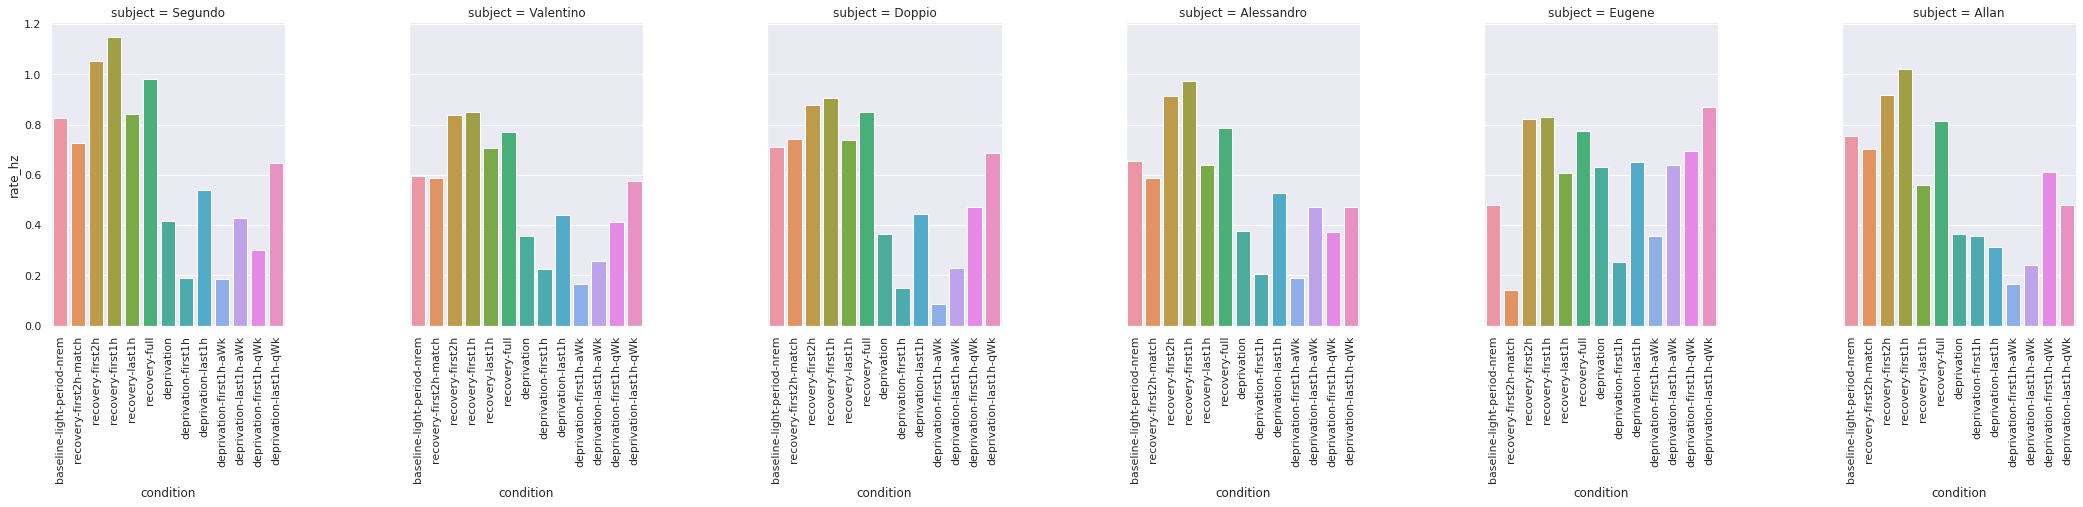

In [6]:
g = sns.catplot(data=df, col='subject', x='condition', y='rate_hz', kind='bar')
g.set_xticklabels(rotation=90)

In [7]:
norms = df.set_index(['subject', 'condition']).xs((slice(None), 'baseline-light-period-nrem')).rate_hz
normed_rates = df.set_index(['subject', 'condition']).rate_hz / norms * 100
normed_rates = normed_rates.rename('normalized_rate')
normed_rates_df = normed_rates.to_frame().reset_index()

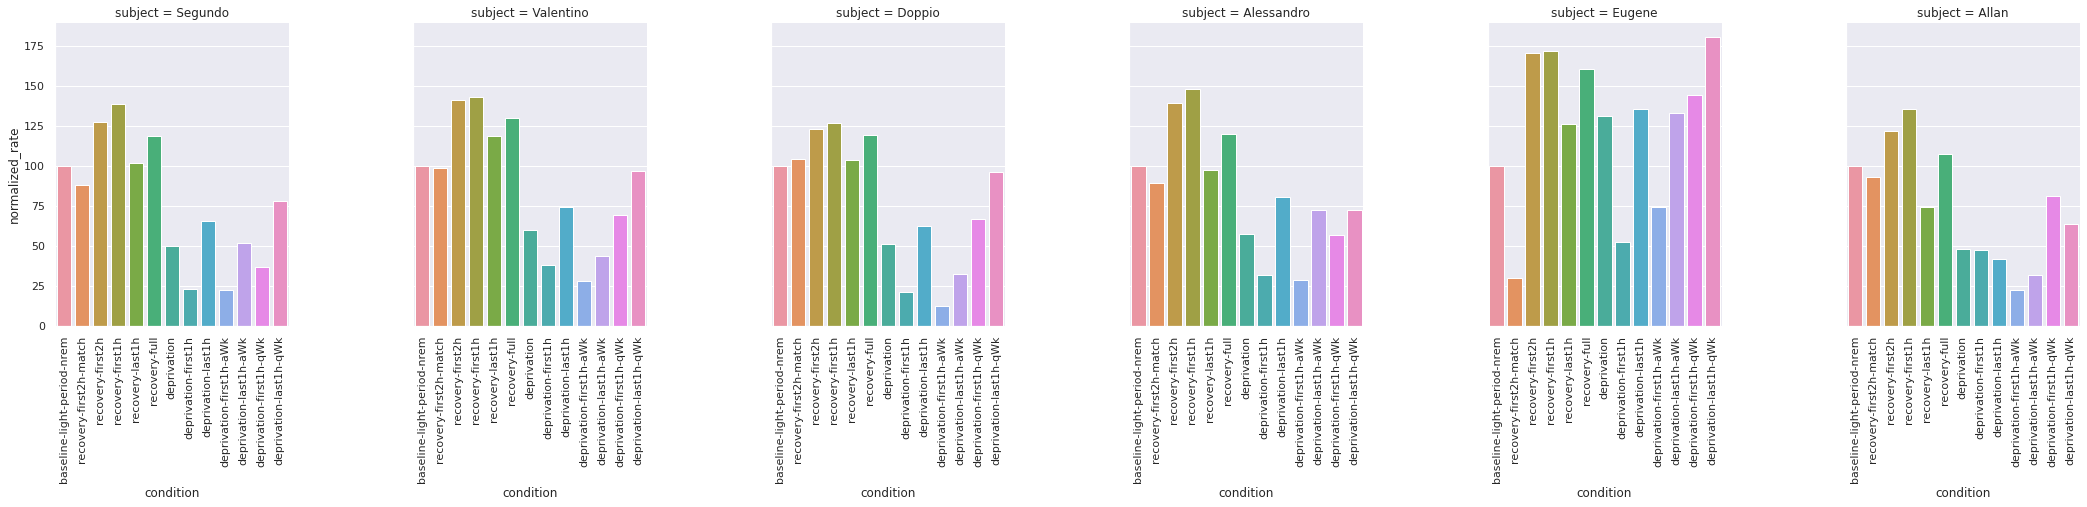

In [8]:
g = sns.catplot(data=normed_rates_df, col='subject', x='condition', y='normalized_rate', kind='bar')
g.set_xticklabels(rotation=90)

In [9]:
rebounds = normed_rates[:, 'recovery-first2h'] - normed_rates[:, 'recovery-first2h-match']
print(rebounds)
print(stats.ttest_1samp(rebounds, 0))

subject
Segundo        39.636266
Valentino      42.741781
Doppio         18.671828
Alessandro     49.821522
Eugene        141.065515
Allan          28.482997
Name: normalized_rate, dtype: float64
Ttest_1sampResult(statistic=2.950506267078754, pvalue=0.03186672274749275)


In [29]:
declines = normed_rates[:, 'recovery-first1h'] - normed_rates[:, 'recovery-last1h']
print(declines)
print(stats.ttest_1samp(declines, 0))

subject
Segundo       36.826801
Valentino     24.163213
Doppio        23.444180
Alessandro    50.889319
Eugene        45.694408
Allan         61.296150
Name: normalized_rate, dtype: float64
Ttest_1sampResult(statistic=6.555433640992871, pvalue=0.00123790405133412)


r: 0.21434225497472817
p: 0.6834103380226355


<AxesSubplot:xlabel='normalized_rate', ylabel='normalized_rate'>

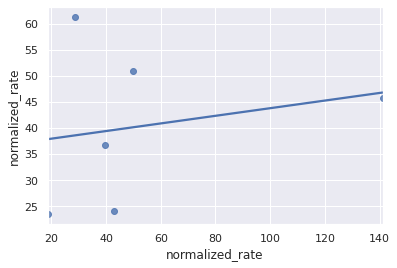

In [30]:
r, p = stats.pearsonr(rebounds, declines)
print(f'r: {r}')
print(f'p: {p}')
sns.regplot(x=rebounds, y=declines, ci=None)

In [31]:
increases = normed_rates[:, 'deprivation-last1h'] - normed_rates[:, 'deprivation-first1h']
print(increases)
print(stats.ttest_1samp(increases, 0))

subject
Segundo       42.235620
Valentino     36.137336
Doppio        41.446578
Alessandro    49.193372
Eugene        82.812043
Allan         -5.634247
Name: normalized_rate, dtype: float64
Ttest_1sampResult(statistic=3.546593219880993, pvalue=0.01644691574758355)


## Non-normalized rates

In [18]:
rates = df.set_index(['subject', 'condition'])['rate_hz']

In [19]:
rebounds = rates[:, 'recovery-first2h'] - rates[:, 'recovery-first2h-match']
print(rebounds)
print(stats.ttest_1samp(rebounds, 0))

subject
Segundo       0.327725
Valentino     0.253710
Doppio        0.133035
Alessandro    0.326974
Eugene        0.679483
Allan         0.214837
Name: rate_hz, dtype: float64
Ttest_1sampResult(statistic=4.168523801931358, pvalue=0.008751538649688634)


In [20]:
declines = rates[:, 'recovery-first1h'] - rates[:, 'recovery-last1h']
print(declines)
print(stats.ttest_1samp(declines, 0))

subject
Segundo       0.304496
Valentino     0.143430
Doppio        0.167037
Alessandro    0.333982
Eugene        0.220101
Allan         0.462336
Name: rate_hz, dtype: float64
Ttest_1sampResult(statistic=5.574658139151844, pvalue=0.002558830146261276)


r: -0.08689938694069421
p: 0.8699790300991304


<AxesSubplot:xlabel='rate_hz', ylabel='rate_hz'>

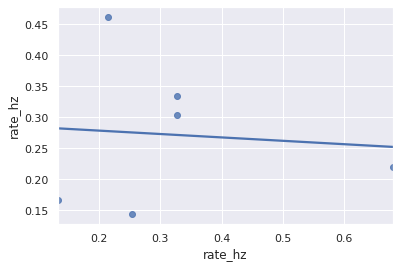

In [21]:
r, p = stats.pearsonr(rebounds, declines)
print(f'r: {r}')
print(f'p: {p}')
sns.regplot(x=rebounds, y=declines, ci=None)

In [22]:
increases = rates[:, 'deprivation-last1h'] - rates[:, 'deprivation-first1h']
print(increases)
print(stats.ttest_1samp(increases, 0))

subject
Segundo       0.349217
Valentino     0.214507
Doppio        0.295303
Alessandro    0.322851
Eugene        0.398889
Allan        -0.042497
Name: rate_hz, dtype: float64
Ttest_1sampResult(statistic=3.956917017520535, pvalue=0.010775977187365393)
